# Customer_Churn_Prediction

## Importing Dataset

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\alisa\Downloads\archive (5)\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing and Cleaning

In [4]:
data.drop(['RowNumber','CustomerId','Surname'],inplace = True,axis = 1)

In [6]:
data.shape

(10000, 11)

In [12]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [9]:
data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
dummies1 = pd.get_dummies(data['Geography'],drop_first=True)
dummies2 = pd.get_dummies(data['Gender'],drop_first=True)

In [18]:
dataset = pd.concat([data,dummies1,dummies2],axis = 1)
dataset.drop(['Geography','Gender'],axis = 1,inplace =True)
dataset.replace({
    True : 1,
    False : 0
},inplace = True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
X = dataset.drop('Exited',axis = 1)
Y = dataset['Exited']

In [26]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x = scalar.fit_transform(X)

## Splitting into Train and Test data

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 42)

In [28]:
X_test.shape

(2000, 11)

## Model Selection and Training

In [63]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train,Y_train)
model_1.score(X_test,Y_test)

0.8125

In [64]:
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()
model_2.fit(X_train,Y_train)
model_2.score(X_test,Y_test)

0.8335

In [65]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators = 10)
model_3.fit(X_train,Y_train)
model_3.score(X_test,Y_test)

0.86

In [66]:
print(model_3.score(X_train,Y_train))

0.986125


We will use randomforestclassifier for the following task (Model3)

In [67]:
y_pred = model_3.predict(X_test)

## Confusion_Matrix and Classification_Report

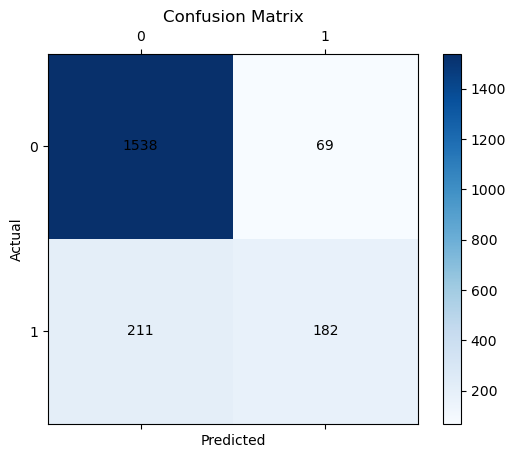

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model_3.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots()

cax = ax.matshow(cm, cmap=plt.cm.Blues)

plt.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')

for (i, j), value in np.ndenumerate(cm):
    ax.text(j, i, f'{value}', ha='center', va='center')


plt.show()

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

